In [42]:
import pymongo
import pandas as pd
import time

In [85]:
usa = pd.read_csv('usa.csv')

In [86]:
ZIP = usa['ZIP'].values

STATE = usa.head(50)['State'].values

In [87]:
client = pymongo.MongoClient()
database = client['test']
collection = database['current']

In [88]:
cursor = collection.find({},{'_id':0,'main':1,'wind':1,'name':1,'coord':1})
entity = list(cursor)

In [89]:
len(entity)

50

In [92]:
weather_dict = {'Name':[],'Temperature':[],'Temp_Min':[],'Temp_Max':[],'Humidity':[],'Wind':[],'Zip':[],'Latitude':[],'Longitude':[]}
for i,ent in enumerate(entity):
    weather_dict['Name'].append(ent['name'])
    weather_dict['Temperature'].append(ent['main']['temp'])
    weather_dict['Temp_Min'].append(ent['main']['temp_min'])
    weather_dict['Temp_Max'].append(ent['main']['temp_max'])
    weather_dict['Humidity'].append(ent['main']['humidity'])
    weather_dict['Wind'].append(ent['wind']['speed'])
    weather_dict['Zip'].append(ZIP[i])
    weather_dict['Latitude'].append(ent['coord']['lat'])
    weather_dict['Longitude'].append(ent['coord']['lon'])
    
df = pd.DataFrame(weather_dict)
df['State'] = STATE

In [91]:
df[df['Name'] == "Montgomery" ].Zip[0]

36104.0

In [9]:
client = pymongo.MongoClient()
database = client['test']
collection = database['forecast']

In [11]:
cursor = collection.find({},{'_id':0,'daily':1})
entity = list(cursor)

In [12]:
forecast_dict = {'dt':[],'Temperature':[],'Temp_Min':[],'Temp_Max':[],'Humidity':[],'Wind':[],'Main':[],'Zip':[]}
for i,ent in enumerate(entity):
    daily = ent['daily']
    for j in range(len(daily)):
        forecast_dict['dt'].append(daily[j]['dt'])
        forecast_dict['Temperature'].append(daily[j]['temp']['day'])
        forecast_dict['Temp_Min'].append(daily[j]['temp']['min'])
        forecast_dict['Temp_Max'].append(daily[j]['temp']['max'])
        forecast_dict['Humidity'].append(daily[j]['humidity'])
        forecast_dict['Wind'].append(daily[j]['wind_speed'])
        forecast_dict['Main'].append(daily[j]['weather'][0]['main'])
        forecast_dict['Zip'].append(ZIP[i])
    
df = pd.DataFrame(forecast_dict)
df.head(5)

,dt,Temperature,Temp_Min,Temp_Max,Humidity,Wind,Main,Zip
0,1633885200,81.07,64.15,83.71,58,6.85,Clouds,36104
1,1633971600,80.19,63.63,83.19,55,6.46,Clouds,36104
2,1634058000,82.78,65.79,86.02,55,5.75,Clear,36104
3,1634144400,84.15,66.69,84.20,46,7.18,Clouds,36104
4,1634230800,85.05,65.86,85.05,51,5.32,Clouds,36104


In [44]:
client = pymongo.MongoClient()
database = client['test']
collection = database['history']

In [51]:
cursor = collection.find({},{'_id':0,'lat':1 , 'lon': 1, 'current':1})
entity = list(cursor)

In [53]:
entity[0]

{'lat': 32.3777,
 'lon': -86.3006,
 'current': {'dt': 1633469753,
  'sunrise': 1633434115,
  'sunset': 1633476293,
  'temp': 74.14,
  'feels_like': 75.25,
  'pressure': 1012,
  'humidity': 85,
  'dew_point': 69.33,
  'uvi': 0.77,
  'clouds': 75,
  'visibility': 10000,
  'wind_speed': 1.01,
  'wind_deg': 49,
  'wind_gust': 1.99,
  'weather': [{'id': 501,
    'main': 'Rain',
    'description': 'moderate rain',
    'icon': '10d'}],
  'rain': {'1h': 1.15}}}

In [55]:
history_dict = {'dt':[],'Temperature':[],'Humidity':[],'Wind':[],'Main':[],'Lat':[],'Lon':[]}
for i,ent in enumerate(entity):
    daily = ent['current']
    history_dict['dt'].append(daily['dt'])
    history_dict['Temperature'].append(daily['temp'])
    history_dict['Humidity'].append(daily['humidity'])
    history_dict['Wind'].append(daily['wind_speed'])
    history_dict['Main'].append(daily['weather'][0]['main'])
    history_dict['Lat'].append(ent['lat'])
    history_dict['Lon'].append(ent['lon'])

df = pd.DataFrame(forecast_dict)
df.head(5)

,dt,Temperature,Temp_Min,Temp_Max,Humidity,Wind,Main,Zip
0,1633885200,81.07,64.15,83.71,58,6.85,Clouds,36104
1,1633971600,80.19,63.63,83.19,55,6.46,Clouds,36104
2,1634058000,82.78,65.79,86.02,55,5.75,Clear,36104
3,1634144400,84.15,66.69,84.20,46,7.18,Clouds,36104
4,1634230800,85.05,65.86,85.05,51,5.32,Clouds,36104


In [2]:
from sqlalchemy import create_engine
from sqlalchemy import inspect
import pandas as pd

In [115]:
def get_State(location):
    split = location.split(',')
    return split[1][1:3]

In [135]:
engine = create_engine("sqlite:///data/data.db")

In [136]:
df = pd.read_sql('SELECT * FROM combined WHERE TMAX IS NOT NULL;', engine)

In [141]:
df['STATE'] = df['NAME'].apply(get_State)
df.fillna(value=0,inplace=True)

In [158]:
mod_df = df[['STATE','TMAX','TMIN','AWND','LATITUDE','LONGITUDE','DATE']].copy()

In [159]:
mod_df['DATE'] = pd.to_datetime(df['DATE'])

In [171]:
# mod_df.info()
mod_df.head(1)

,STATE,TMAX,TMIN,AWND,LATITUDE,LONGITUDE,DATE
0,AR,44.0,36.0,11.41,34.8353,-92.2596,2021-01-01


In [174]:
mod_df[(df['STATE'] =='CO') & (df['DATE'] <= "2021-01-31")]

,STATE,TMAX,TMIN,AWND,LATITUDE,LONGITUDE,DATE
6849,CO,43.0,20.0,0.0,39.6211,-105.0655,2021-01-01
6850,CO,41.0,21.0,0.0,39.6211,-105.0655,2021-01-02
6851,CO,52.0,21.0,0.0,39.6211,-105.0655,2021-01-03
6852,CO,52.0,25.0,0.0,39.6211,-105.0655,2021-01-04
6853,CO,55.0,29.0,0.0,39.6211,-105.0655,2021-01-05
...,...,...,...,...,...,...,...
15596,CO,33.0,18.0,0.0,39.4286,-105.0702,2021-01-26
15597,CO,49.0,3.0,0.0,39.4286,-105.0702,2021-01-27
15598,CO,54.0,31.0,0.0,39.4286,-105.0702,2021-01-29
15599,CO,58.0,24.0,0.0,39.4286,-105.0702,2021-01-30


In [148]:
import seaborn as sns

/Users/zhihuang/opt/anaconda3/envs/metis/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/zhihuang/opt/anaconda3/envs/metis/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


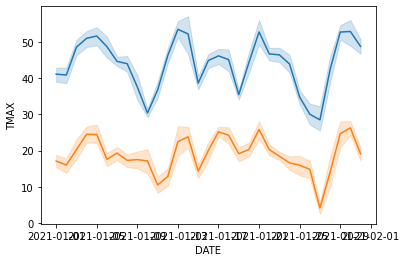

In [186]:
graph = mod_df[(df['STATE'] =='CO') & (df['DATE'] < "2021-02-01")].copy()
sns.lineplot(graph.DATE,graph.TMAX)
sns.lineplot(graph.DATE,graph.TMIN);

/Users/zhihuang/opt/anaconda3/envs/metis/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


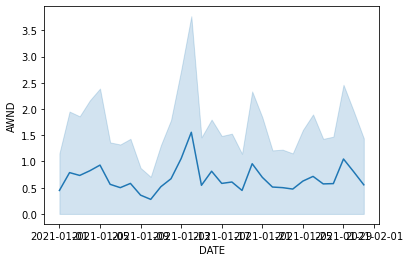

In [187]:
avg_wind = graph['AWND'].mean()
sns.lineplot(graph.DATE,graph.AWND);